# Supervised learning - Meds dataset - Classification

---

We are going to use this dataset to define which med you take each pacient based on different parameters such as:
- age
- sex
- blood pressure (BP)
- cholesterol
- Na_to_K

We are going to use:
- Multiclass logitics regression method => accuracy = 1 and confussion matrix classifies all test data OK
- Decission tree => 4 branches allow to have an easy to use methode for doctors with accuracy = 1
NOTE that decission tree clearly states that the key value to decide which med is best to deliver is Na_to_K

---

In [1]:
# Loading pkg and methods
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.shape

(200, 6)

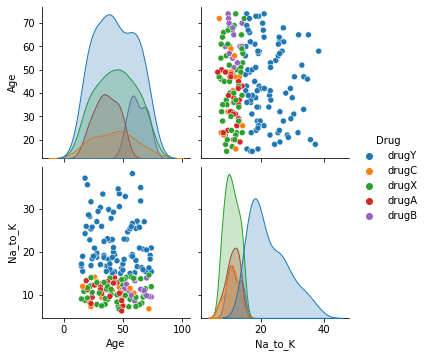

In [6]:
sns.pairplot(data = df, kind = 'scatter' , hue = 'Drug');

In [7]:
df.groupby(['Sex','Drug']).size()

Sex  Drug 
F    drugA     9
     drugB     6
     drugC     7
     drugX    27
     drugY    47
M    drugA    14
     drugB    10
     drugC     9
     drugX    27
     drugY    44
dtype: int64

In [8]:
# Transforming Categorical features to Numerical
for col_name in df.columns:
    
    if (df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
        
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


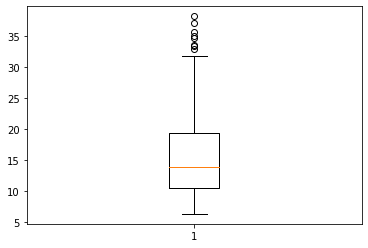

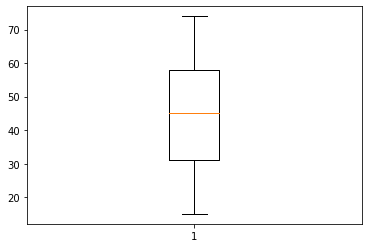

In [9]:
plt.boxplot(df['Na_to_K'])
plt.show()
plt.boxplot(df['Age'])
plt.show()

In [10]:
X = df[df != df['Drug']].values
y = df['Drug']

## Multiclass logistic regression

In [11]:
def logRegr(X,y,test_size):

    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    
    # Normalizing X
    X = StandardScaler().fit(X).transform(X);

    # Setting training and test data from the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, shuffle=True);
    X_train = np.around(X_train, decimals = 3);
    X_test = np.around(X_test, decimals = 3);

    # We train the binary logistic regression model and fit
    clf = LogisticRegression(multi_class = 'multinomial', solver='lbfgs').fit(X, y)
    
    # Predicted values from X_test
    y_hat = clf.predict(X_test);

    # Metrics
    acc = accuracy_score(y_test, y_hat)
    
    print('The accuracy of the model is: ' , acc)
    print(confusion_matrix(y_test, y_hat))
    
    return[X_train, X_test, y_train, y_test, y_hat , acc];

In [12]:
X_train, X_test, y_train, y_test, y_hat, acc = logRegr(X,y,0.2)

The accuracy of the model is:  1.0
[[ 4  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 18]]


## Decision Tree

DT_accuracy_score =  1.0
[[ 4  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 18]]


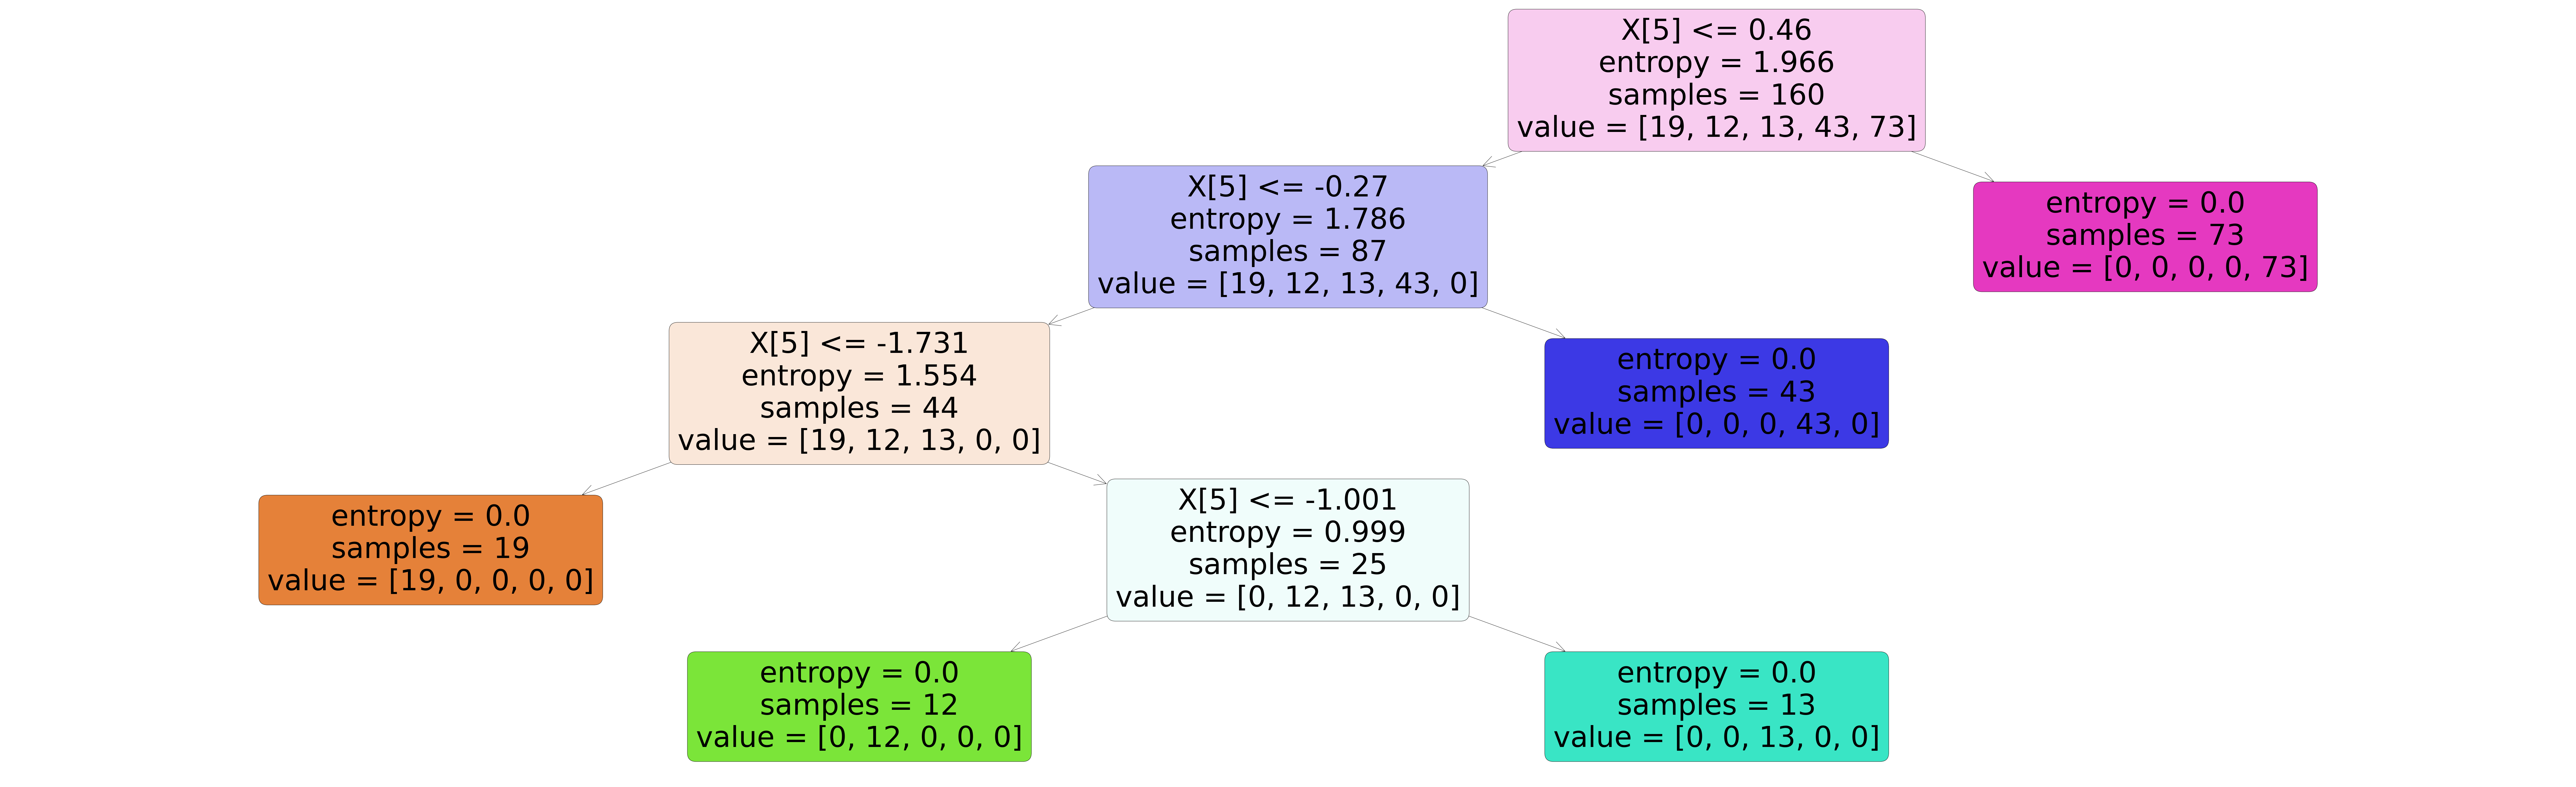

In [26]:
# Importing the packages and methods
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

# Build the decision tree model and train it
depth = 4 # depth of the tree
DT = tree.DecisionTreeClassifier(criterion="entropy",max_depth=depth)
DT = DT.fit(X_train,y_train)
    
# Predicted values from X_test
y_hat = DT.predict(X_test)

# Getting metrics
DT_accuracy = accuracy_score(y_test,y_hat).round(decimals = 3)
print('DT_accuracy_score = ', DT_accuracy)

# Getting confusion matrix
cm = confusion_matrix(y_test, y_hat)
print(cm)

# PLotting the tree
plt.figure(figsize=(160,50))
a = plot_tree(DT,
              filled=True, 
              rounded=True, 
              fontsize=100)

### Basically X[5] that is Na_to_K defines which Med is best to deliver.